# HW2: Plotting & viz

due Tuesday Feb 8, 2021 @ 8pm

**submission instructions:**
make a new directory in your HW github repo
(e.g., `<yourname>_hw_2/`)

## Critique the most important figure from a seminal paper in your field

a) Embed (using `<img src= ...`) the original figure/caption along with a link to the original work. 

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnature24459/MediaObjects/41586_2017_Article_BFnature24459_Fig1_HTML.jpg" width="60%">

#### This figure is taken from "Measurement of the multi-TeV neutrino interaction cross-section with IceCube using Earth absorption".
 
#### link: https://www.nature.com/articles/nature24459

b) In your own words, what story is this figure trying to convey? What does it do well? What could have been done better? What elements didn't need to be present to still convey the same story?

#### This figure compares the measured neutrino cross section (black) with the Standard Model prediction (red) above 1 TeV. The yellow region on the left shows the accelerator data where numerous measurements had been made. The pink uncertainty band covers the red SM prediction, indicating that the measurement is consistent with the SM.

#### This figure choses axis wisely. Instead of showing the cross section as a function of energy, it divides out the energy such that the cross section is constant in the <1 TeV region. In this way, the reader could easily realize that the cross section rises slower at higher energies. The legend is also concise, without showing redundant information such as names of accelerator experiments. 

#### 1) The "accelerator data" region could be improved. Currently, all data points are mixed together with a mysterious color scheme (black and dark green) and a poor resolution. Two barely-visible horizontal lines and a dotted black line might indicate the mean and the 1-sigma uncertainty, but their meanings are ambiguous even by reading the caption. 2) The spacing between points in the neutrino and antineutrino prediction curve could be explained. The current spacing is uneven, but the reason for this choice is not explained in the caption. 3) Use more color-bind-friendly palette because the current red and green lines might be confusing. 

#### This plot is already very concise. The solid dots in the dashed neutrino and antineutrino predictions might be removed if the locations of the dots are not important. 

## Reproduce one of your old published-paper quality plots with Bokeh or matplotlib.

a) Provide the original plot, the recreated Bokeh/matlibplot plot, and the Python code used to make the new plot.  You can ask us for an example from us if you don't have your own plots.

<img src="my_figure.png" width="40%">

#### The figure above shows my original plot. It is used to illustrate a veto efficiency as a function of energy and distance variables. 

In [1]:
# original code:

# dist_bins = np.linspace(0,2500,100)
# energy_bins = np.linspace(5.5,7,100)
# h_before,x,y=np.histogram2d(d_to_IT_center_data_burn,np.log10(truncated_muon_e_data_burn),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
# h_after,x,y=np.histogram2d(d_to_IT_center_data_burn[passed_2_Tank],np.log10(truncated_muon_e_data_burn)[passed_2_Tank],bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
# ineff = ((h_after/h_before)).T

# plt.figure(figsize=(9,7))
# t = np.arange(0,2500,1)
# lowstat = 5.47+2.3*np.sqrt(1 - (t/2280)**2)
# plt.plot(t,lowstat,color='black',linestyle='--',label='low statistics')
# my_cmap = matplotlib.cm.get_cmap('rainbow')
# my_cmap.set_under('w')
# # plt.hist2d(d,x,weights=ineff.ravel(),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
# plt.pcolormesh(x,y,ineff,cmap=my_cmap)
# plt.colorbar()
# CS=plt.contour(ineff,extent=[0,2500,5.5,7],levels=[0.2,0.4,0.6,0.8])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
# plt.clim(0,1)
# plt.xlabel('Distance to Center of IceTop [m]')
# plt.ylabel(r'$\log_{10}$(Muon Energy Proxy) [GeV]')
# plt.xlim(0,2500)
# plt.ylim(5.5,7)
# plt.legend(loc='upper right')
# # plt.title('IceTop Inefficiency from Data')
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.size"] = 18
# plt.show()

#### Here is a new plot recreated using Bokeh:

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import timedelta

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColorBar, LogColorMapper

output_notebook()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Loading BokehJS ...

In [3]:
arr = np.load('arr.npy')

p = figure(width=480, height=400, x_range=(0,2500), y_range=(5.5,7), 
#            x_axis_label='$$Distance\ to\ Center\ of\ IceTop\ [m]$$', 
#            y_axis_label='$$\log_{10}$$(Muon Energy Proxy) [GeV]',
          toolbar_location=None,)

color_mapper = LogColorMapper(palette="Blues256", low=1e-3, high=1)
p.image(image=[arr],x=0, y=5.5, dw=2500, dh=1.5, palette="Blues256")
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12)
p.add_layout(color_bar, 'right')


t = np.arange(0,2500,1)
lowstat = 5.47+2.3*np.sqrt(1 - (t/2280)**2)
p.line(t,lowstat, line_width=3, line_color='darkorange', line_dash='dashed', legend_label='Low statistics')
p.title.text_font_size = '12pt'
p.xaxis.axis_label = r"$$Distance\ to\ Center\ of\ IceTop\ (m)$$"
p.yaxis.axis_label = r"$$\log_{10}\ Muon\ Energy\ Proxy\ (GeV)$$"

show(p)

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


b) Add some (new) dynamic interactions to the plot--does it help tell your story better?

In [4]:
from bokeh.events import PointEvent
from bokeh.io import curdoc
from bokeh.plotting import figure
from bokeh.models import HoverTool

arr = np.load('arr.npy')

# display coordinate and value at that position!
hover = HoverTool(
            tooltips=[
                ("Distance and energy", "($x{4.f}, $y{1.1f})"),
                ("Value of histogram", "@image{1.3f}"),
                ])
TOOLS = [hover]

p = figure(width=480, height=400, x_range=(0,2500), y_range=(5.5,7), 
          toolbar_location=None,tools=TOOLS
          )

color_mapper = LogColorMapper(palette="Blues256", low=1e-3, high=1)
p.image(image=[arr],x=0, y=5.5, dw=2500, dh=1.5, palette="Blues256")
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12)
p.add_layout(color_bar, 'right')


t = np.arange(0,2500,1)
lowstat = 5.47+2.3*np.sqrt(1 - (t/2280)**2)
p.line(t,lowstat, line_width=3, line_color='darkorange', line_dash='dashed', legend_label='Low statistics')
p.title.text_font_size = '12pt'
p.xaxis.axis_label = r"$$Distance\ to\ Center\ of\ IceTop\ (m)$$"
p.yaxis.axis_label = r"$$\log_{10}\ Muon\ Energy\ Proxy\ (GeV)$$"

show(p)

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


#### This helps a lot because the value of the histogram at each (d, E) coordinate is an important information. I don't need to print out the values any more when studying the data!

##  Volcano-induced Blastwave moving through California in 2022

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Shockwave_from_Hunga_Tonga_GOES_17.gif/440px-Shockwave_from_Hunga_Tonga_GOES_17.gif" width="30%">

The massive volcanic eruption near Tonga in the Pacific Ocean (20.550°S 175.385°W) occurred at 04:14:45 [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) on 15 January 2022. The above animation (credit: Tim Schmit, NOAA/NESDIS/ASPB) shows propogation of the shockwave across the Earth as seen from space (using infrared measurements of water vapor). That shockwave was also measured as changing pressure in weather stations around the world. 

a) The CSV file `data/california_pressure_2022_01_15.csv` contains [Automated Surface Observing System (ASOS)](https://mesonet.agron.iastate.edu/ASOS/) pressure measurements at 64 stations in California taken several hours later that day, observed with 1-minute resolution. Read this data into a `pandas` DataFrame and then plot in the same figure the pressure as a function of time at SBA (Santa Barbara Municipal Airport, in Southern California), OAK (Oakland Airport, Bay Area), and MHS (Mount Shasta City, in Northern California). To allow a better visual comparison between the three, divide each plot by the initial value at the start of each of the timeseries. Overplot a 5-min thick vertical line for each timeseries (with the same color as the line) at the maximum of that series.

In [5]:
df = pd.read_csv('data/california_pressure_2022_01_15.csv', parse_dates=[0])
df.rename(columns={'valid(UTC)': 'time'}, inplace=True)
df.head()

,time,ACV,BFL,DAG,BIH,BLU,BLH,BUR,CMA,CRQ,...,SMX,SMO,STS,TVL,SCK,TRM,UKI,VCB,VNY,WVI
0,2022-01-15 09:00:00,29.970,29.653,28.226,26.172,24.978,29.744,29.327,30.020,29.730,...,29.842,29.894,30.050,24.090,30.195,30.287,29.536,30.115,29.241,30.002
1,2022-01-15 09:01:00,29.969,29.654,28.226,26.172,24.978,29.743,29.328,30.020,29.730,...,29.842,29.894,30.050,24.090,30.197,30.287,29.536,30.116,29.241,30.002
2,2022-01-15 09:02:00,29.969,29.654,28.227,26.172,24.978,29.743,29.328,30.021,29.731,...,29.842,29.894,30.050,24.091,30.197,30.287,29.535,30.117,29.240,30.002
3,2022-01-15 09:03:00,29.969,29.654,28.227,26.175,24.977,29.744,29.327,30.020,29.730,...,29.842,29.894,30.051,24.091,30.195,30.288,29.535,30.117,29.240,30.002
4,2022-01-15 09:04:00,29.969,29.655,28.228,26.174,24.977,29.745,29.327,30.019,29.731,...,29.841,29.894,30.049,24.090,30.195,30.288,29.534,30.118,29.240,30.002


In [6]:
def plotmax(station, color):
    maxi = df['time'][df[station] == np.max(df[station])].iloc[0]
    max_l = maxi - timedelta(minutes=2.5)
    max_r = maxi + timedelta(minutes=2.5)
    ax.axvspan(max_l, max_r, alpha=0.3, color=color)

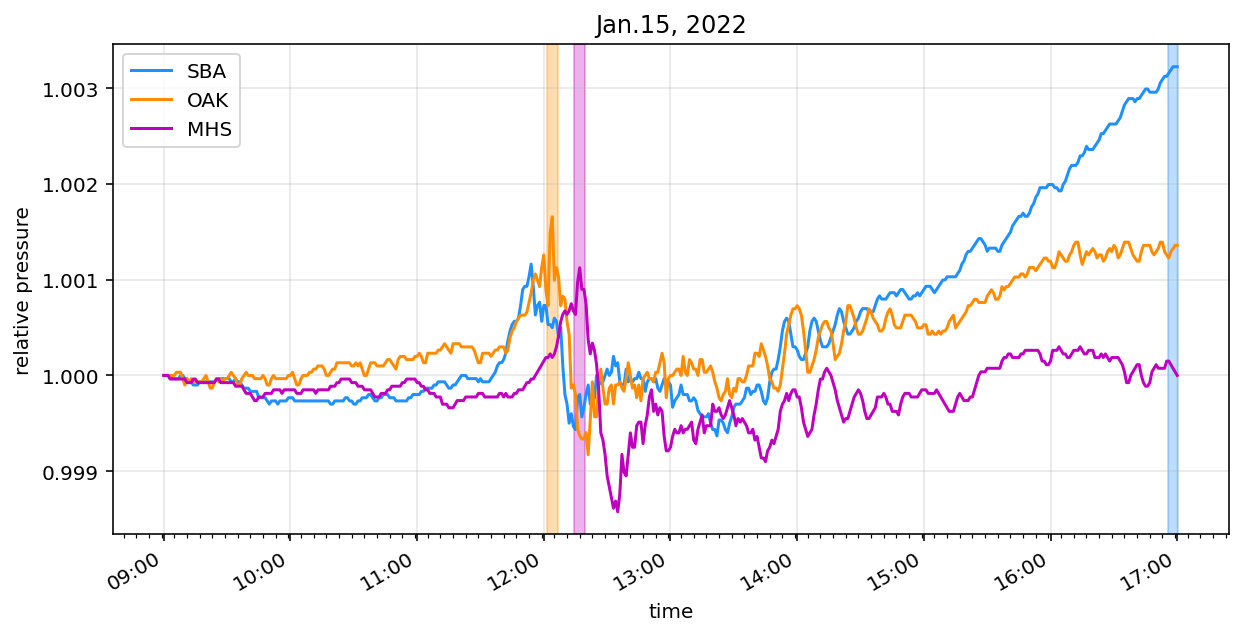

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['time'], df['SBA']/df['SBA'][0], label='SBA', color='dodgerblue')
ax.plot(df['time'], df['OAK']/df['OAK'][0], label='OAK', color='darkorange')
ax.plot(df['time'], df['MHS']/df['MHS'][0], label='MHS', color='m')

plotmax('SBA', 'dodgerblue')
plotmax('OAK', 'darkorange')
plotmax('MHS', 'm')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=6))
ax.set_xlabel('time')
ax.set_ylabel('relative pressure')
plt.gcf().autofmt_xdate() # Rotation
plt.legend()
plt.grid(alpha=0.3)
plt.title('Jan.15, 2022')
plt.show()

b) What can you say about the similarity or dissimilarity of the three series? Why argument can you make that the similarities are due to the Tongan shockwave and not other effects? What do you notice about the location of the maximum of the three series?

### All three series exhibit a strong up+downward fluctuation followed by small sinusoidal vibrations. However, the SBA station records a significant increase in the overall presure afterwards. 

### The similarities are likely due to the Tonga shockwave because the upward and downward pressure variations corresponds to the peak and trough of the shock wavefront. 

### The maximum location of the three series do not necessarily corresponds to the exact arrival time of the shock wave. 

c) On a map of California, create a static vizualization of the timelag of the passage of the shockwave through the 64 stations in California. You might find it helpful to detect significant changes at each station using rolling percent changes on ~5-10 minute intervals (cf. [`.pct_change(periods=...)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) in pandas). The file `data/ca_asos.csv` contains the latitude and longitude of the stations. 

In [8]:
import geopandas as gpd
from shapely.geometry import Point

# california map
df_ca = gpd.read_file('data/tl_2016_06_cousub/tl_2016_06_cousub.shp')
# stations locations
df_geo = pd.read_csv('data/ca_asos.csv', parse_dates=[0])
df_geo.head()

,stid,station_name,lat,lon,elev,begints,iem_network
0,AAT,ALTURAS (WAS O00),41.49139,-120.56444,1333.0,4.367520e+08,CA_ASOS
1,ACV,ARCATA/EUREKA ARPT,40.97811,-124.10861,66.0,-6.337800e+08,CA_ASOS
2,AUN,AURBURN MUNICIPAL AIRPORT,38.95481,-121.08172,467.0,1.030864e+09,CA_ASOS
3,AVX,AVALON/CATALINA,33.40500,-118.41583,488.0,-8.380260e+08,CA_ASOS
4,BFL,BAKERSFIELD/MEADOWS,35.43440,-119.05420,150.0,-8.915184e+08,CA_ASOS


In [9]:
# drop stations in df_geo where shock data DNE
stations = df.columns[1:]
df_geo = df_geo[df_geo['stid'].isin(stations)].reset_index().drop(columns=['index'])

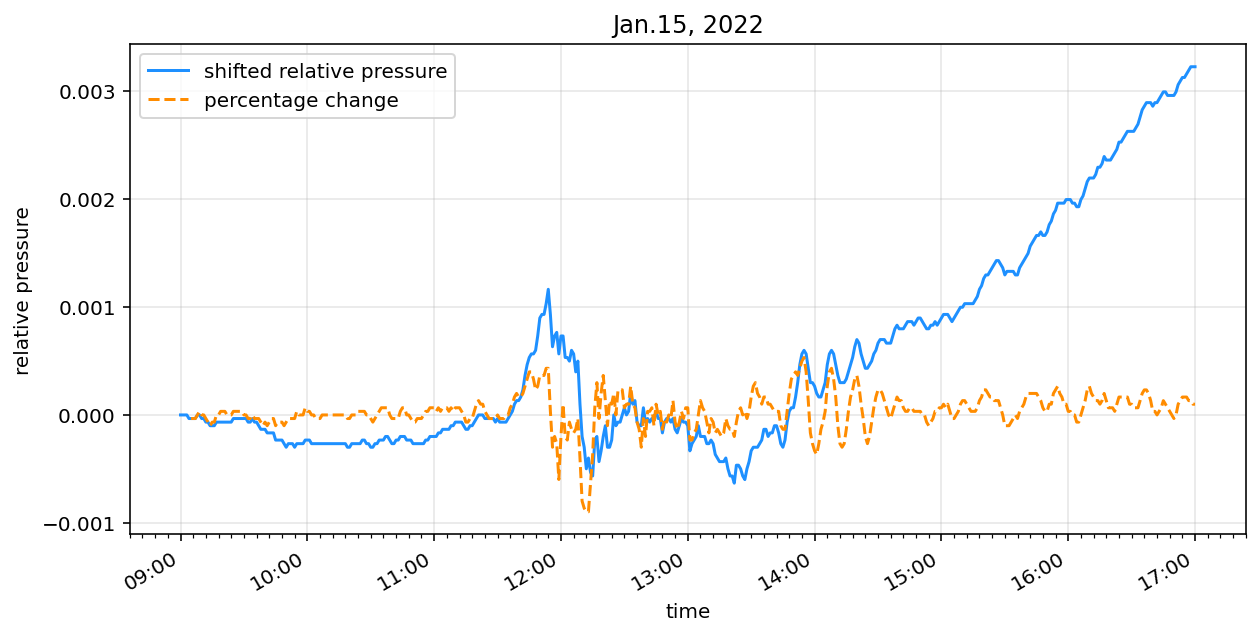

In [10]:
# visualize pressure gradients
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['time'], -1 + df['SBA']/df['SBA'][0], label='shifted relative pressure', color='dodgerblue')
ax.plot(df['time'], df['SBA'].pct_change(periods=5), '--', label='percentage change', color='darkorange')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=6))
ax.set_xlabel('time')
ax.set_ylabel('relative pressure')
plt.gcf().autofmt_xdate() # Rotation
plt.legend()
plt.grid(alpha=0.3)
plt.title('Jan.15, 2022')
plt.show()

In [11]:
# calculate percent change and find time of shock wave arriving
period = 5

tmp = []
tmp_raw = []
min_val = []
for s in stations:
    changes = df[s].pct_change(periods=period)
    t_min = df['time'].loc[changes == np.min(changes)] # TimeStamp
    tmp_raw.append(pd.Timestamp(t_min.values[0]))
    tmp.append(pd.Timestamp(t_min.values[0]).minute)
df_geo['t_shock'] = tmp
df_geo['t_shock_raw'] = tmp_raw

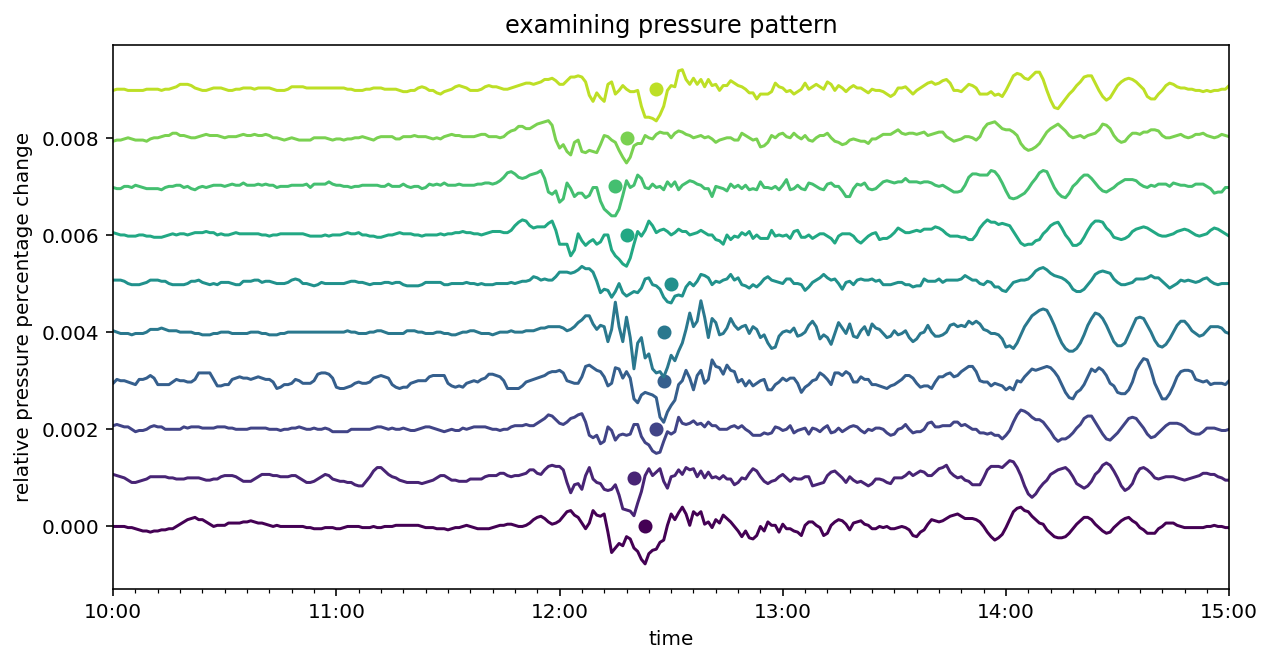

In [12]:
# visualize pressure gradients for all stations
stations = df.columns[1:]
fig, ax = plt.subplots(figsize=(10,5))
cm = matplotlib.cm.get_cmap()
n_lines = 10
for i in range(n_lines):
    ax.plot(df['time'], i/1000 + 0.7 * df[stations[i]].pct_change(periods=period), color=cm(i/n_lines))
    ax.plot(df_geo[df_geo['stid']==stations[i]]['t_shock_raw'], i/1000, 'o', color=cm(i/n_lines))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=6))
ax.set_xlabel('time')
ax.set_ylabel('relative pressure percentage change')
plt.title('examining pressure pattern')
plt.xlim(datetime.datetime(2022, 1, 15, 10, 00), datetime.datetime(2022, 1, 15, 15, 00))
plt.show()


In [13]:
# convert df_geo to geodata object
df_geo = gpd.GeoDataFrame(
    df_geo, geometry=gpd.points_from_xy(df_geo['lon'], df_geo['lat']))
df_geo.head()

,stid,station_name,lat,lon,elev,begints,iem_network,t_shock,t_shock_raw,geometry
0,ACV,ARCATA/EUREKA ARPT,40.97811,-124.10861,66.0,-633780000.0,CA_ASOS,23,2022-01-15 12:23:00,POINT (-124.10861 40.97811)
1,BFL,BAKERSFIELD/MEADOWS,35.43440,-119.05420,150.0,-891518400.0,CA_ASOS,20,2022-01-15 12:20:00,POINT (-119.05420 35.43440)
2,DAG,BARSTOW-DAGGETT,34.85361,-116.78583,587.0,-667908000.0,CA_ASOS,26,2022-01-15 12:26:00,POINT (-116.78583 34.85361)
3,BIH,BISHOP AIRPORT,37.37311,-118.36361,1263.0,-850752000.0,CA_ASOS,28,2022-01-15 12:28:00,POINT (-118.36361 37.37311)
4,BLU,BLUE CANYON (AMOS),39.27497,-120.70975,1611.0,-694281600.0,CA_ASOS,28,2022-01-15 12:28:00,POINT (-120.70975 39.27497)


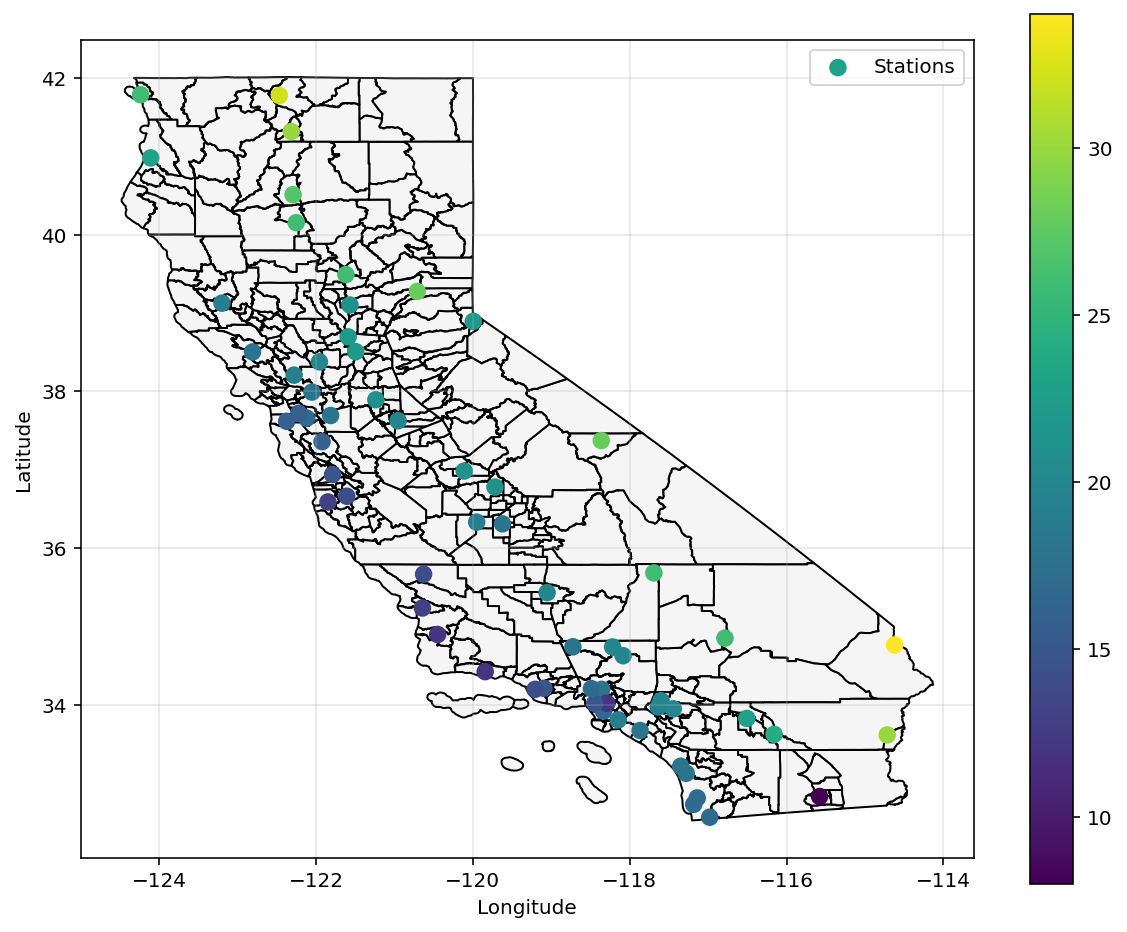

In [14]:
# visualize shock wave!
fig, ax = plt.subplots(figsize=(10,8))
df_ca.plot(ax=ax, color='whitesmoke', edgecolor='black')
im = df_geo.plot(ax=ax, column=df_geo['t_shock'], label='Stations', cmap='viridis', legend=True, markersize=60)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

d) Pick one station and determine when you believe the shockwave first passed through that station. Using this information and the time of the explosion determine the speed of the shockwave. How does this compare to the speed of sound in air?

In [15]:
# station with smallest shock arrival time
first_station = df_geo[df_geo['t_shock'] == np.min(df_geo['t_shock'])].iloc[0]

In [16]:
# (20.550°S 175.385°W) occurred at 04:14:45 [UTC] on 15 January 2022
t_start = datetime.datetime(2022, 1, 15, 4, 14, 45)
t_arrive = first_station['t_shock_raw']
dt = (t_arrive - t_start) / np.timedelta64(1, 's')
print('time: ' + str(dt) + ' s')

geom=[Point(xy) for xy in zip([-175.385,first_station['lon']],[-20.55,first_station['lat']])]
gdf=gpd.GeoDataFrame(geometry=geom,crs={'init':'epsg:4326'})
gdf.to_crs('epsg:3310',inplace=True)
l=gdf.distance(gdf.shift())[1]
print('distance: ' + str(l) + ' m')

time: 28395.0 s
distance: 8676583.16982684 m


/Users/yang/miniconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [17]:
speed = l / dt
print('shock wave speed: ' + str(speed) + ' m/s')

shock wave speed: 305.56728895322556 m/s


### The shock wave travels around 305 m/s. This is 10% slower than the speed of sound in air. 

**EXTRA CREDIT**  Produce an animation of passage of the shockwave through California using this dataset. Hint: take at look at `matplotlib.animation.FuncAnimation`.

In [18]:
# save shock wave!
for t in np.arange(0, 40, 1):
# for t in np.arange(0, 35, 5):
    fig, ax = plt.subplots(figsize=(8,7))
    cm = matplotlib.cm.get_cmap('coolwarm')
    df_ca.plot(ax=ax, color='whitesmoke', edgecolor='black', alpha=0.5)
    for s in range(len(df_geo)):
        station = df_geo.iloc[s]
        cval = 1 - np.abs(station['t_shock'] - t)/35  
        color = cm(cval)
        ax.plot(station['lon'],station['lat'],'o',color=color, markersize=cval**2*10)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('data/animation/frame_' +str(t).zfill(2) + '.png', dpi=300)
    # plt.show()
    plt.close()


In [19]:
# save png as movie
import imageio as io
import glob

images = []
fs = []
for f in glob.glob('data/animation/*.png'):
    fs.append(f)
fs.sort()
for f in fs:
    images.append(io.imread(f))
io.mimsave('final_cut.gif', images, fps=20)


<img src="final_cut.gif" width="50%" align="center">

### Method: produce a series of .png files and save as a movie. 